In [1]:
!wget c -P /home/ https://raw.githubusercontent.com/HemersonRafael/ml/main/leao.jpg?token=AD5SBCGEWSYNMXIJCNDCGMDAQI4ZE


--2021-04-16 02:52:55--  http://c/
Resolving c (c)... failed: Name or service not known.
wget: unable to resolve host address ‘c’
--2021-04-16 02:52:55--  https://raw.githubusercontent.com/HemersonRafael/ml/main/leao.jpg?token=AD5SBCGPAM6K3VCWT6NN7ZLAQIUX4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274224 (268K) [image/jpeg]
Saving to: ‘/home/leao.jpg?token=AD5SBCGPAM6K3VCWT6NN7ZLAQIUX4’

leao.jpg?token=AD5S 100%[===================>] 267.80K  --.-KB/s    in 0.04s   

2021-04-16 02:52:55 (7.12 MB/s) - ‘/home/leao.jpg?token=AD5SBCGPAM6K3VCWT6NN7ZLAQIUX4’ saved [274224/274224]

FINISHED --2021-04-16 02:52:55--
Total wall clock time: 0.4s
Downloaded: 1 files, 268K in 0.04s (7.12 MB/s)


In [2]:
# Instalando a MiniSOM
!pip install minisom


  Created wheel for minisom: filename=MiniSom-2.2.8-cp37-none-any.whl size=8604 sha256=fcd2919484c83fa2b5fa753995250b5e386720a56310a7ed2353156c639842f7
  Stored in directory: /root/.cache/pip/wheels/78/7e/a8/435947263149d3b94fa65339751f8c65617c436b0bdfb29c7d
Successfully built minisom


In [3]:
import sys
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import urllib.request
%matplotlib inline

# read the image
img = plt.imread('/home/leao.jpg?token=AD5SBCGEWSYNMXIJCNDCGMDAQI4ZE')
# reshaping the pixels matrix
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255

In [4]:
# SOM initialization and training
print('training...')
som = MiniSom(3, 3, 3, sigma=1.,
learning_rate=0.2, neighborhood_function='bubble') # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy() # saving the starting weights
som.train_random(pixels, 1000)
print('quantization...')
qnt = som.quantization(pixels) # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt): # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = q
print('done.')



training...
quantization...
building new image...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  del sys.path[0]


done.


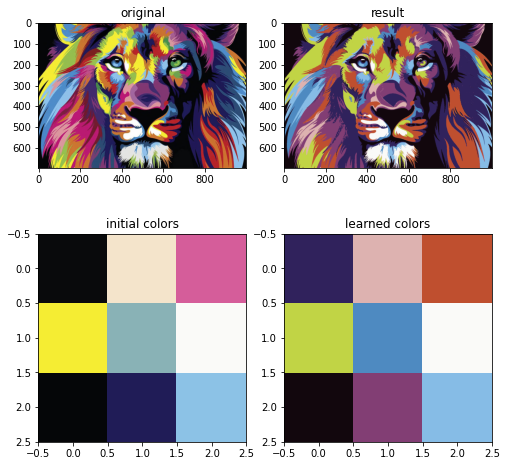

In [5]:
# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)
plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')
plt.tight_layout()
plt.show()